In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
city_df = pd.read_csv("Pyber Resources/city_data.csv")
#city_df.head()
ride_df = pd.read_csv("Pyber Resources/ride_data.csv")
#ride_df.head()

In [3]:
rides_groupby_city = ride_df.groupby("city")

city_rides = pd.DataFrame(rides_groupby_city["fare"].mean())
city_rides = city_rides.rename(columns={"fare":"average_fare"})
city_rides["rides_count"] = rides_groupby_city["ride_id"].count()
city_rides.head()

,average_fare,rides_count
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Barronchester,36.422500,16
Bethanyland,32.956111,18
Bradshawfurt,40.064000,10


In [4]:
city_ride_data = pd.merge(city_df,city_rides,how='outer',on='city')
urban_rides=city_ride_data.loc[city_ride_data["type"]=="Urban",:]
rural_rides=city_ride_data.loc[city_ride_data["type"]=="Rural",:]
suburban_rides=city_ride_data.loc[city_ride_data["type"]=="Suburban",:]

<IPython.core.display.Javascript object>


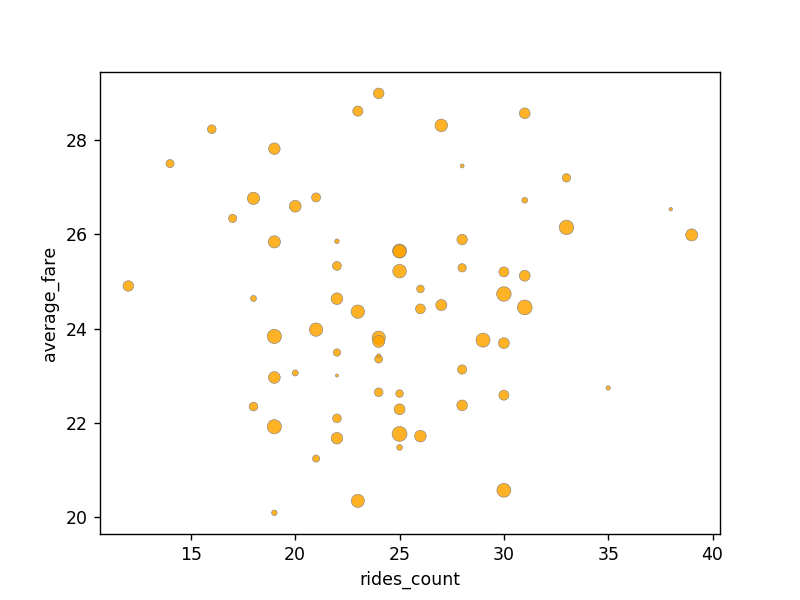

<IPython.core.display.Javascript object>


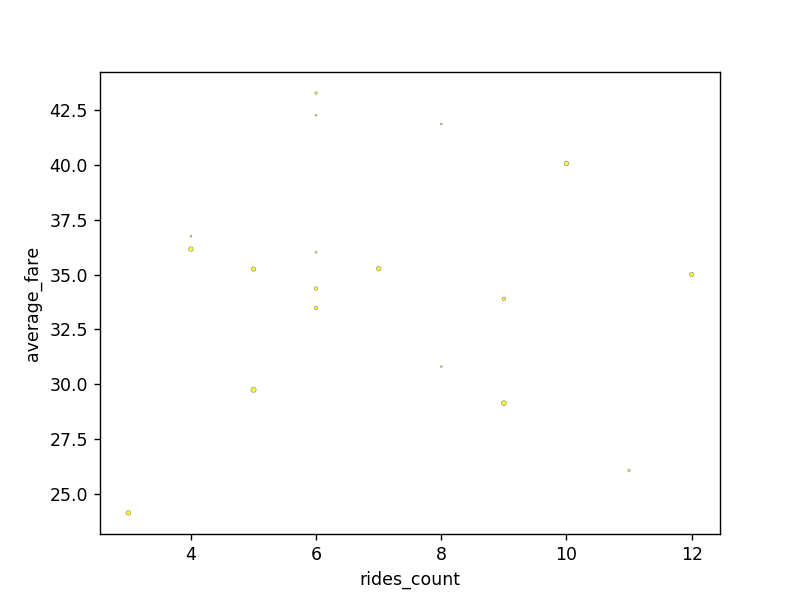

<IPython.core.display.Javascript object>


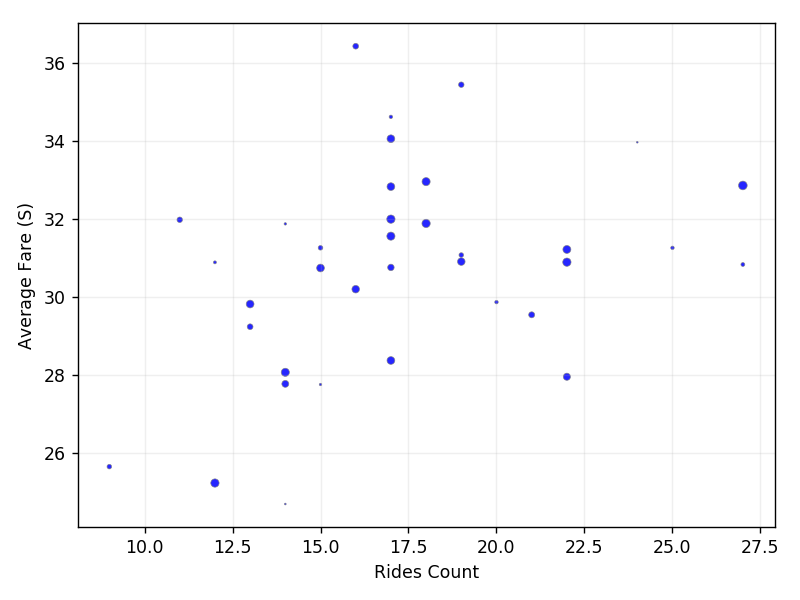

In [5]:
urban_rides.plot(kind='scatter', x="rides_count", y="average_fare", s=urban_rides["driver_count"], color= "orange",edgecolor="grey",linewidth=0.4, alpha=0.85)
rural_rides.plot(kind='Scatter', x="rides_count", y="average_fare", s=rural_rides["driver_count"], color= "yellow",edgecolor="grey",linewidth=0.4, alpha=0.85)
suburban_rides.plot(kind='scatter',x="rides_count", y="average_fare",s=suburban_rides["driver_count"],color="blue",edgecolor="grey",linewidth=0.4, alpha=0.85)
plt.show()
plt.tight_layout()
plt.xlabel("Rides Count")
plt.ylabel("Average Fare (S)")
plt.grid(alpha=0.2)